In [2]:
from utils import *
from dataset_finger import *

from dataset import *
# Load Configuration
from plotting_configs import *
from plotting_factory import plot_time_iq_signal
args = get_config_as_args()

train_dataset = RML2018_Dataset(args=args)
train_dataset.summarize_dataset()

[Shuffle & Restart] Splits set: train=644, val=92, test=185
Splits created: Train=644, Val=92, Test=185
Dataset loaded with 921 total filtered samples
📦 Original Dataset Size: (320000, 512, 2)
📦 Used Data Length (from config): 1000
🧪 Split Summary:
   - Train Samples: 644
   - Val Samples:   92
   - Test Samples:  185
-----------------------------
IQ min: I = -3.2635, Q = -3.3172
IQ max: I = 3.3755, Q = 3.4937
SNR range: [0] to [22]

📊 Class distribution:
  BPSK: 65 samples
  QPSK: 59 samples
  8PSK: 61 samples
  16APSK: 58 samples
  32APSK: 72 samples
  64APSK: 64 samples
  128APSK: 50 samples
  16QAM: 57 samples
  32QAM: 50 samples
  64QAM: 60 samples
  128QAM: 57 samples
  256QAM: 54 samples
  AM-DSB-SC: 51 samples
  AM-DSB-WC: 42 samples
  FM: 60 samples
  GMSK: 61 samples

📶 SNR distribution:
  SNR 0: 85 samples
  SNR 2: 87 samples
  SNR 4: 85 samples
  SNR 6: 89 samples
  SNR 8: 83 samples
  SNR 10: 86 samples
  SNR 12: 102 samples
  SNR 14: 81 samples
  SNR 16: 79 samples
  SNR 

'📦 Original Dataset Size: (320000, 512, 2)\n📦 Used Data Length (from config): 1000\n🧪 Split Summary:\n   - Train Samples: 644\n   - Val Samples:   92\n   - Test Samples:  185\n-----------------------------\nIQ min: I = -3.2635, Q = -3.3172\nIQ max: I = 3.3755, Q = 3.4937\nSNR range: [0] to [22]\n\n📊 Class distribution:\n  BPSK: 65 samples\n  QPSK: 59 samples\n  8PSK: 61 samples\n  16APSK: 58 samples\n  32APSK: 72 samples\n  64APSK: 64 samples\n  128APSK: 50 samples\n  16QAM: 57 samples\n  32QAM: 50 samples\n  64QAM: 60 samples\n  128QAM: 57 samples\n  256QAM: 54 samples\n  AM-DSB-SC: 51 samples\n  AM-DSB-WC: 42 samples\n  FM: 60 samples\n  GMSK: 61 samples\n\n📶 SNR distribution:\n  SNR 0: 85 samples\n  SNR 2: 87 samples\n  SNR 4: 85 samples\n  SNR 6: 89 samples\n  SNR 8: 83 samples\n  SNR 10: 86 samples\n  SNR 12: 102 samples\n  SNR 14: 81 samples\n  SNR 16: 79 samples\n  SNR 18: 81 samples\n  SNR 20: 63 samples'

[Shuffle & Restart] Splits set: train=192348, val=27478, test=54958
Splits created: Train=192348, Val=27478, Test=54958
Dataset loaded with 274784 total filtered samples
tensor([10, 13,  5,  6,  0, 13,  0,  2,  8,  4, 12,  7, 15,  3, 13, 15,  3, 14,
         2, 13, 13, 12,  2,  9,  0,  1,  4, 11, 13, 13, 13,  0,  1,  9, 14,  4,
         3,  0, 11,  8, 14,  5, 11,  9, 14,  8, 13,  2,  8,  7,  9,  8, 13,  2,
        10, 10,  2,  7,  9,  5, 10, 10, 13, 14, 12,  8,  0, 14,  6,  7,  2,  6,
        13,  5,  8, 12,  6,  0,  6,  5,  3,  4, 15,  3,  6,  4,  5, 14,  7, 11,
        10, 12,  2,  8,  2,  8,  6,  5,  4, 14,  5, 13,  9,  1, 11, 13, 15, 14,
        13,  4,  0, 13, 10,  7,  0,  9,  8,  8,  8,  7,  8, 14,  1,  5,  0,  1,
        10, 13])
Batch 1:
  IQ Shape: torch.Size([1, 2, 512])
  Labels Shape: torch.Size([128])
  SNRs Shape: torch.Size([128])
  Statuses Shape: torch.Size([128])
  First few labels: [10, 13, 5, 6, 0]
  First few SNRs: [2, 10, 2, 18, 2]
  First few Statuses: [0, 0, 0, 

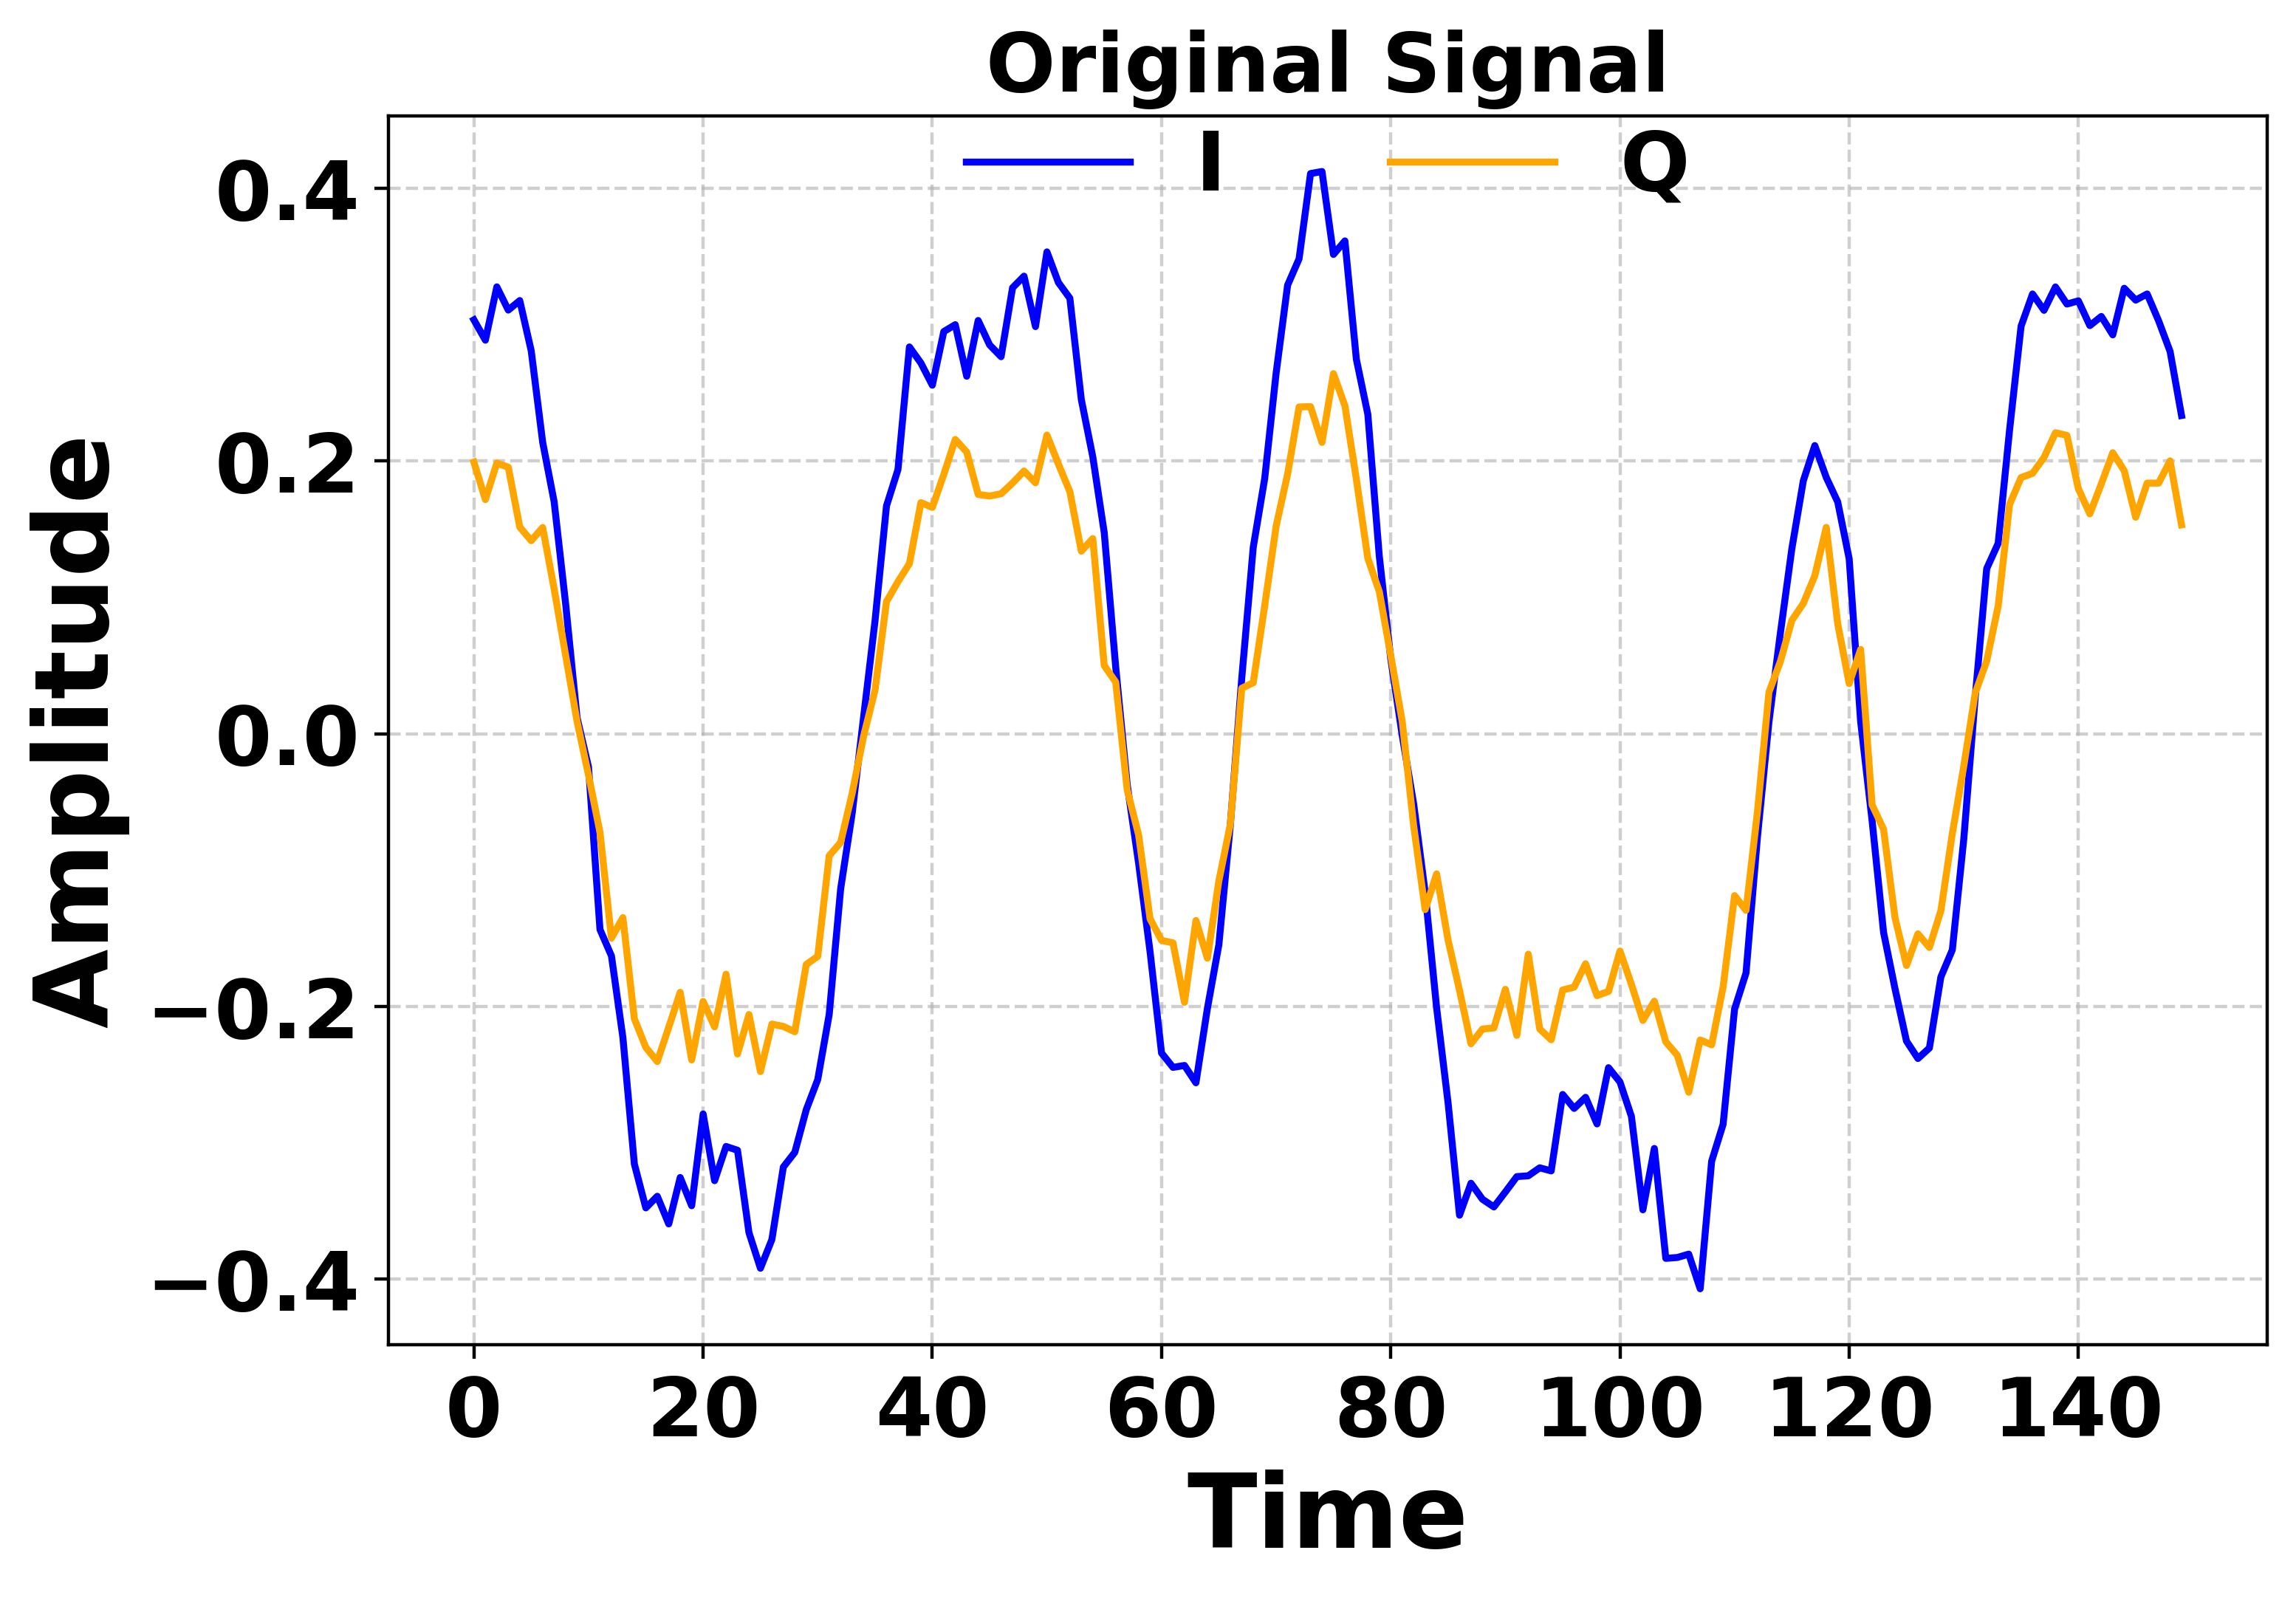

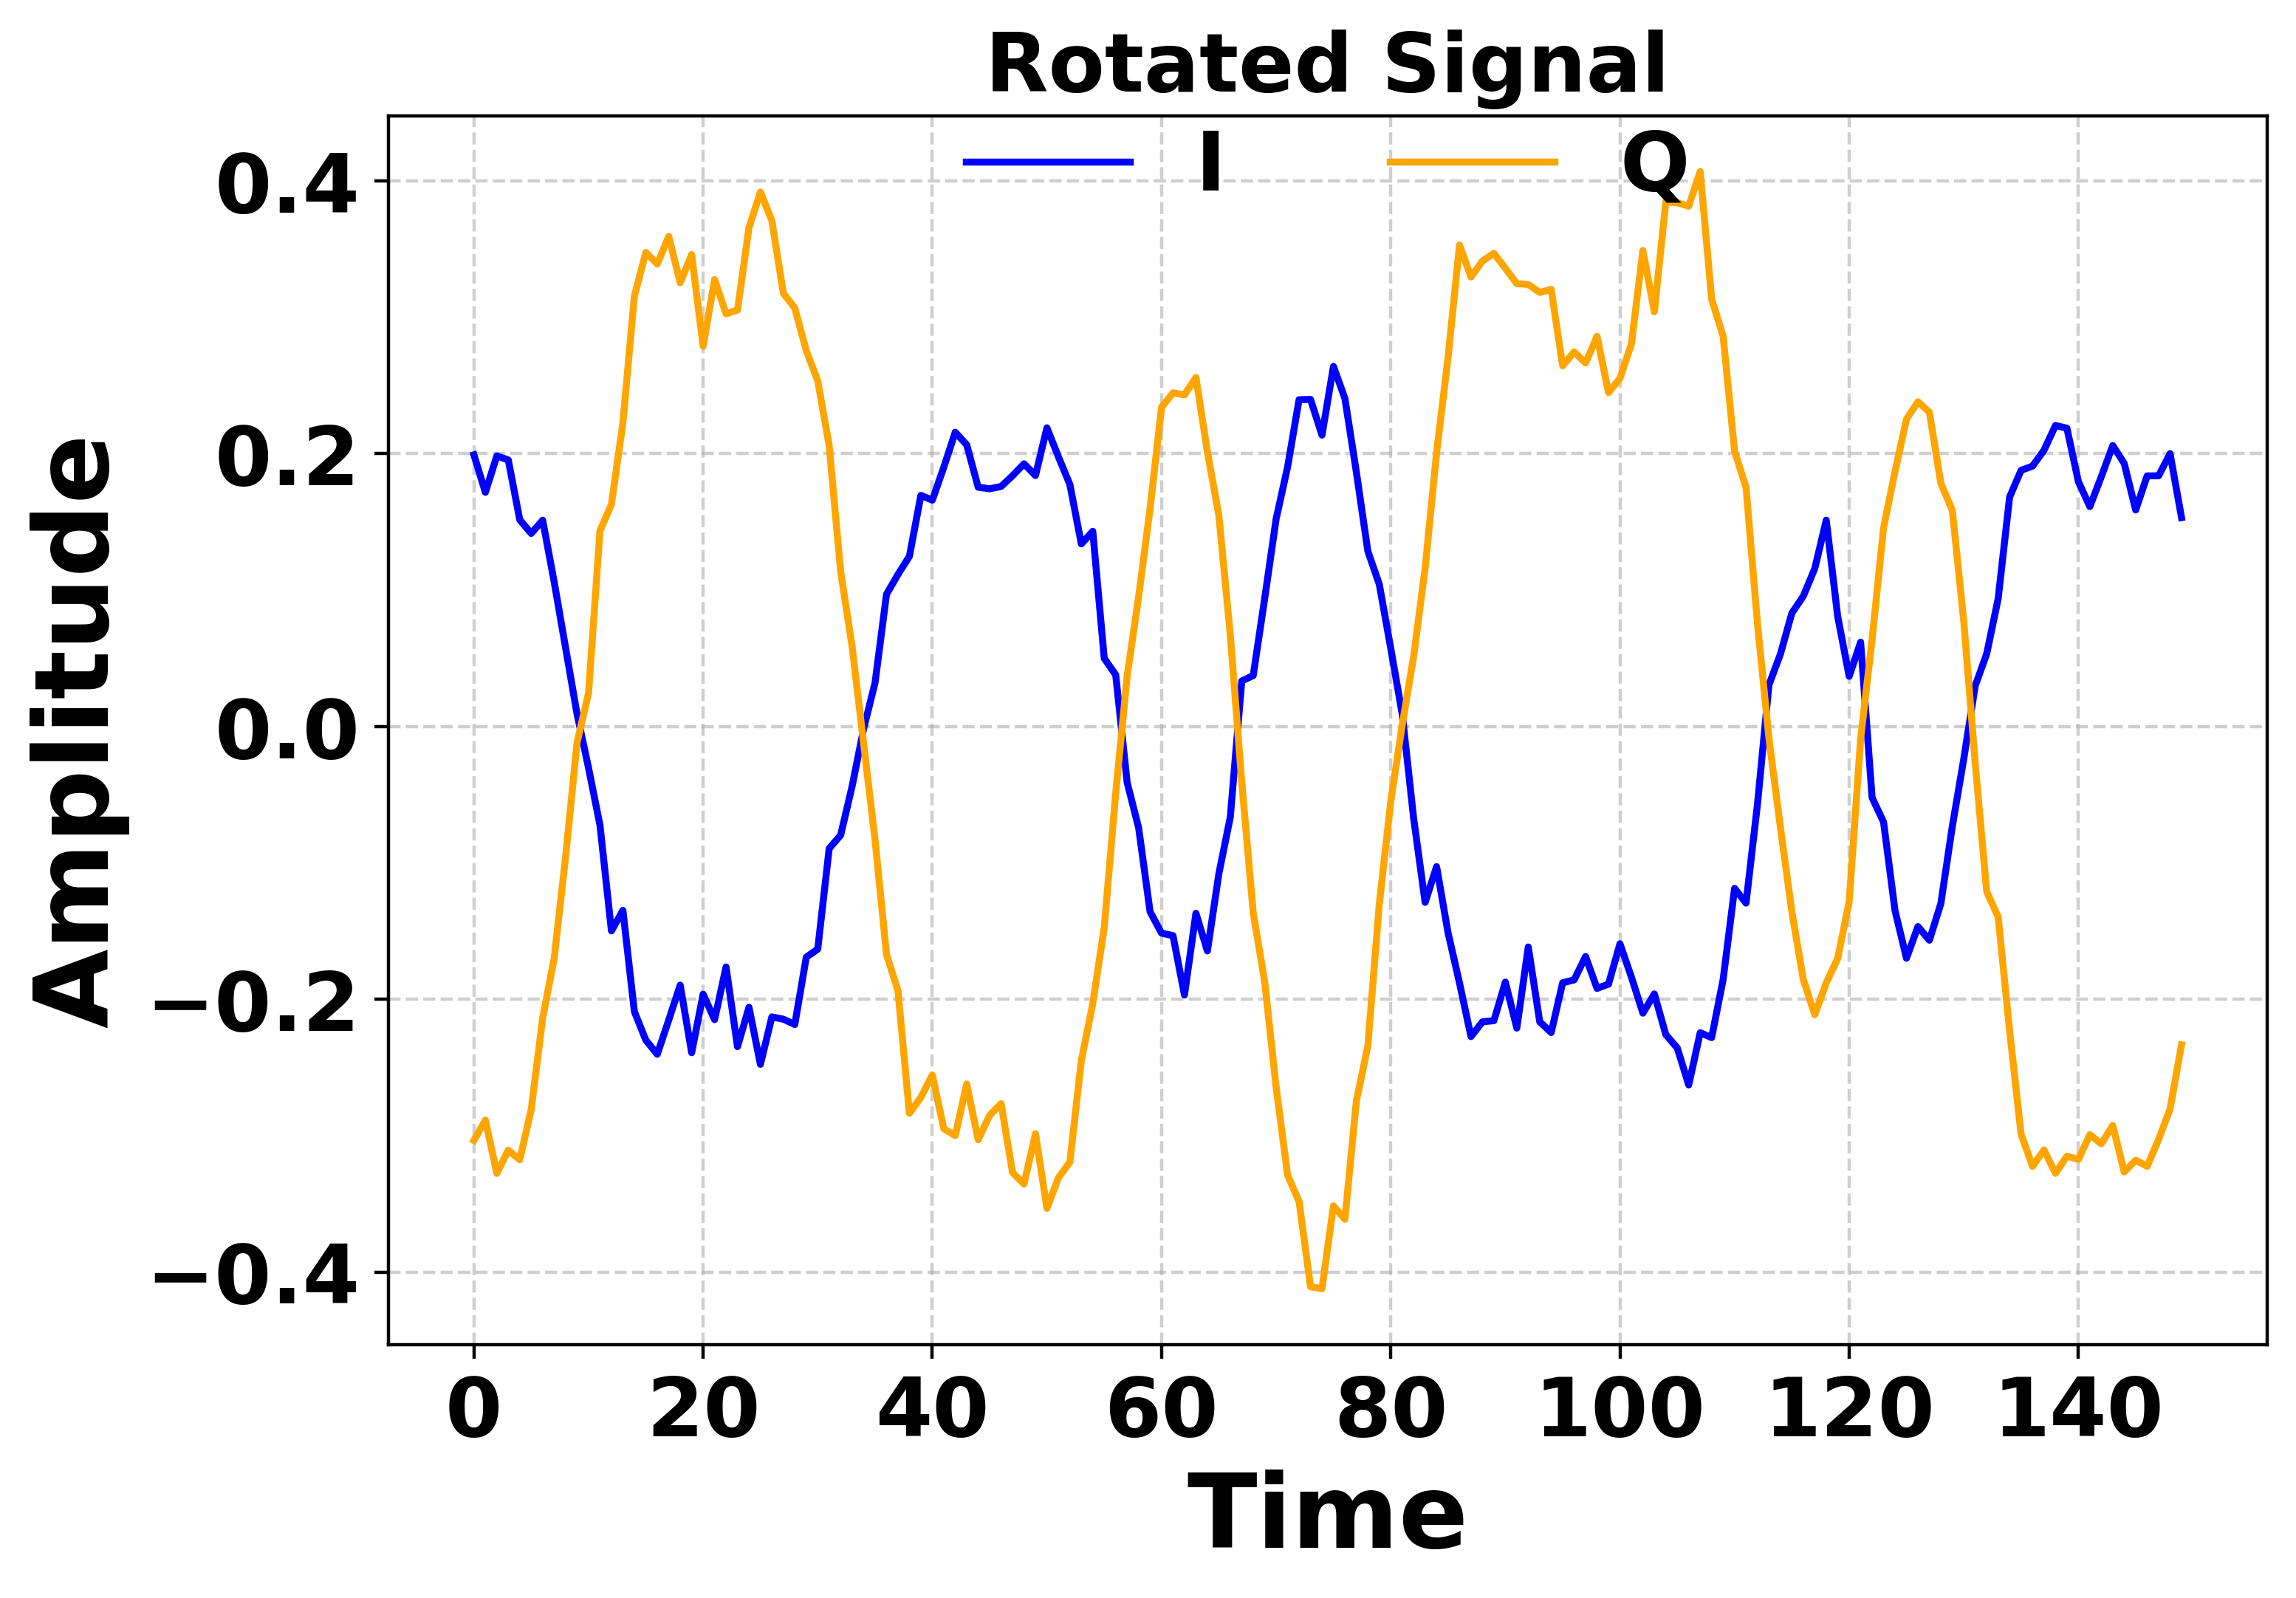

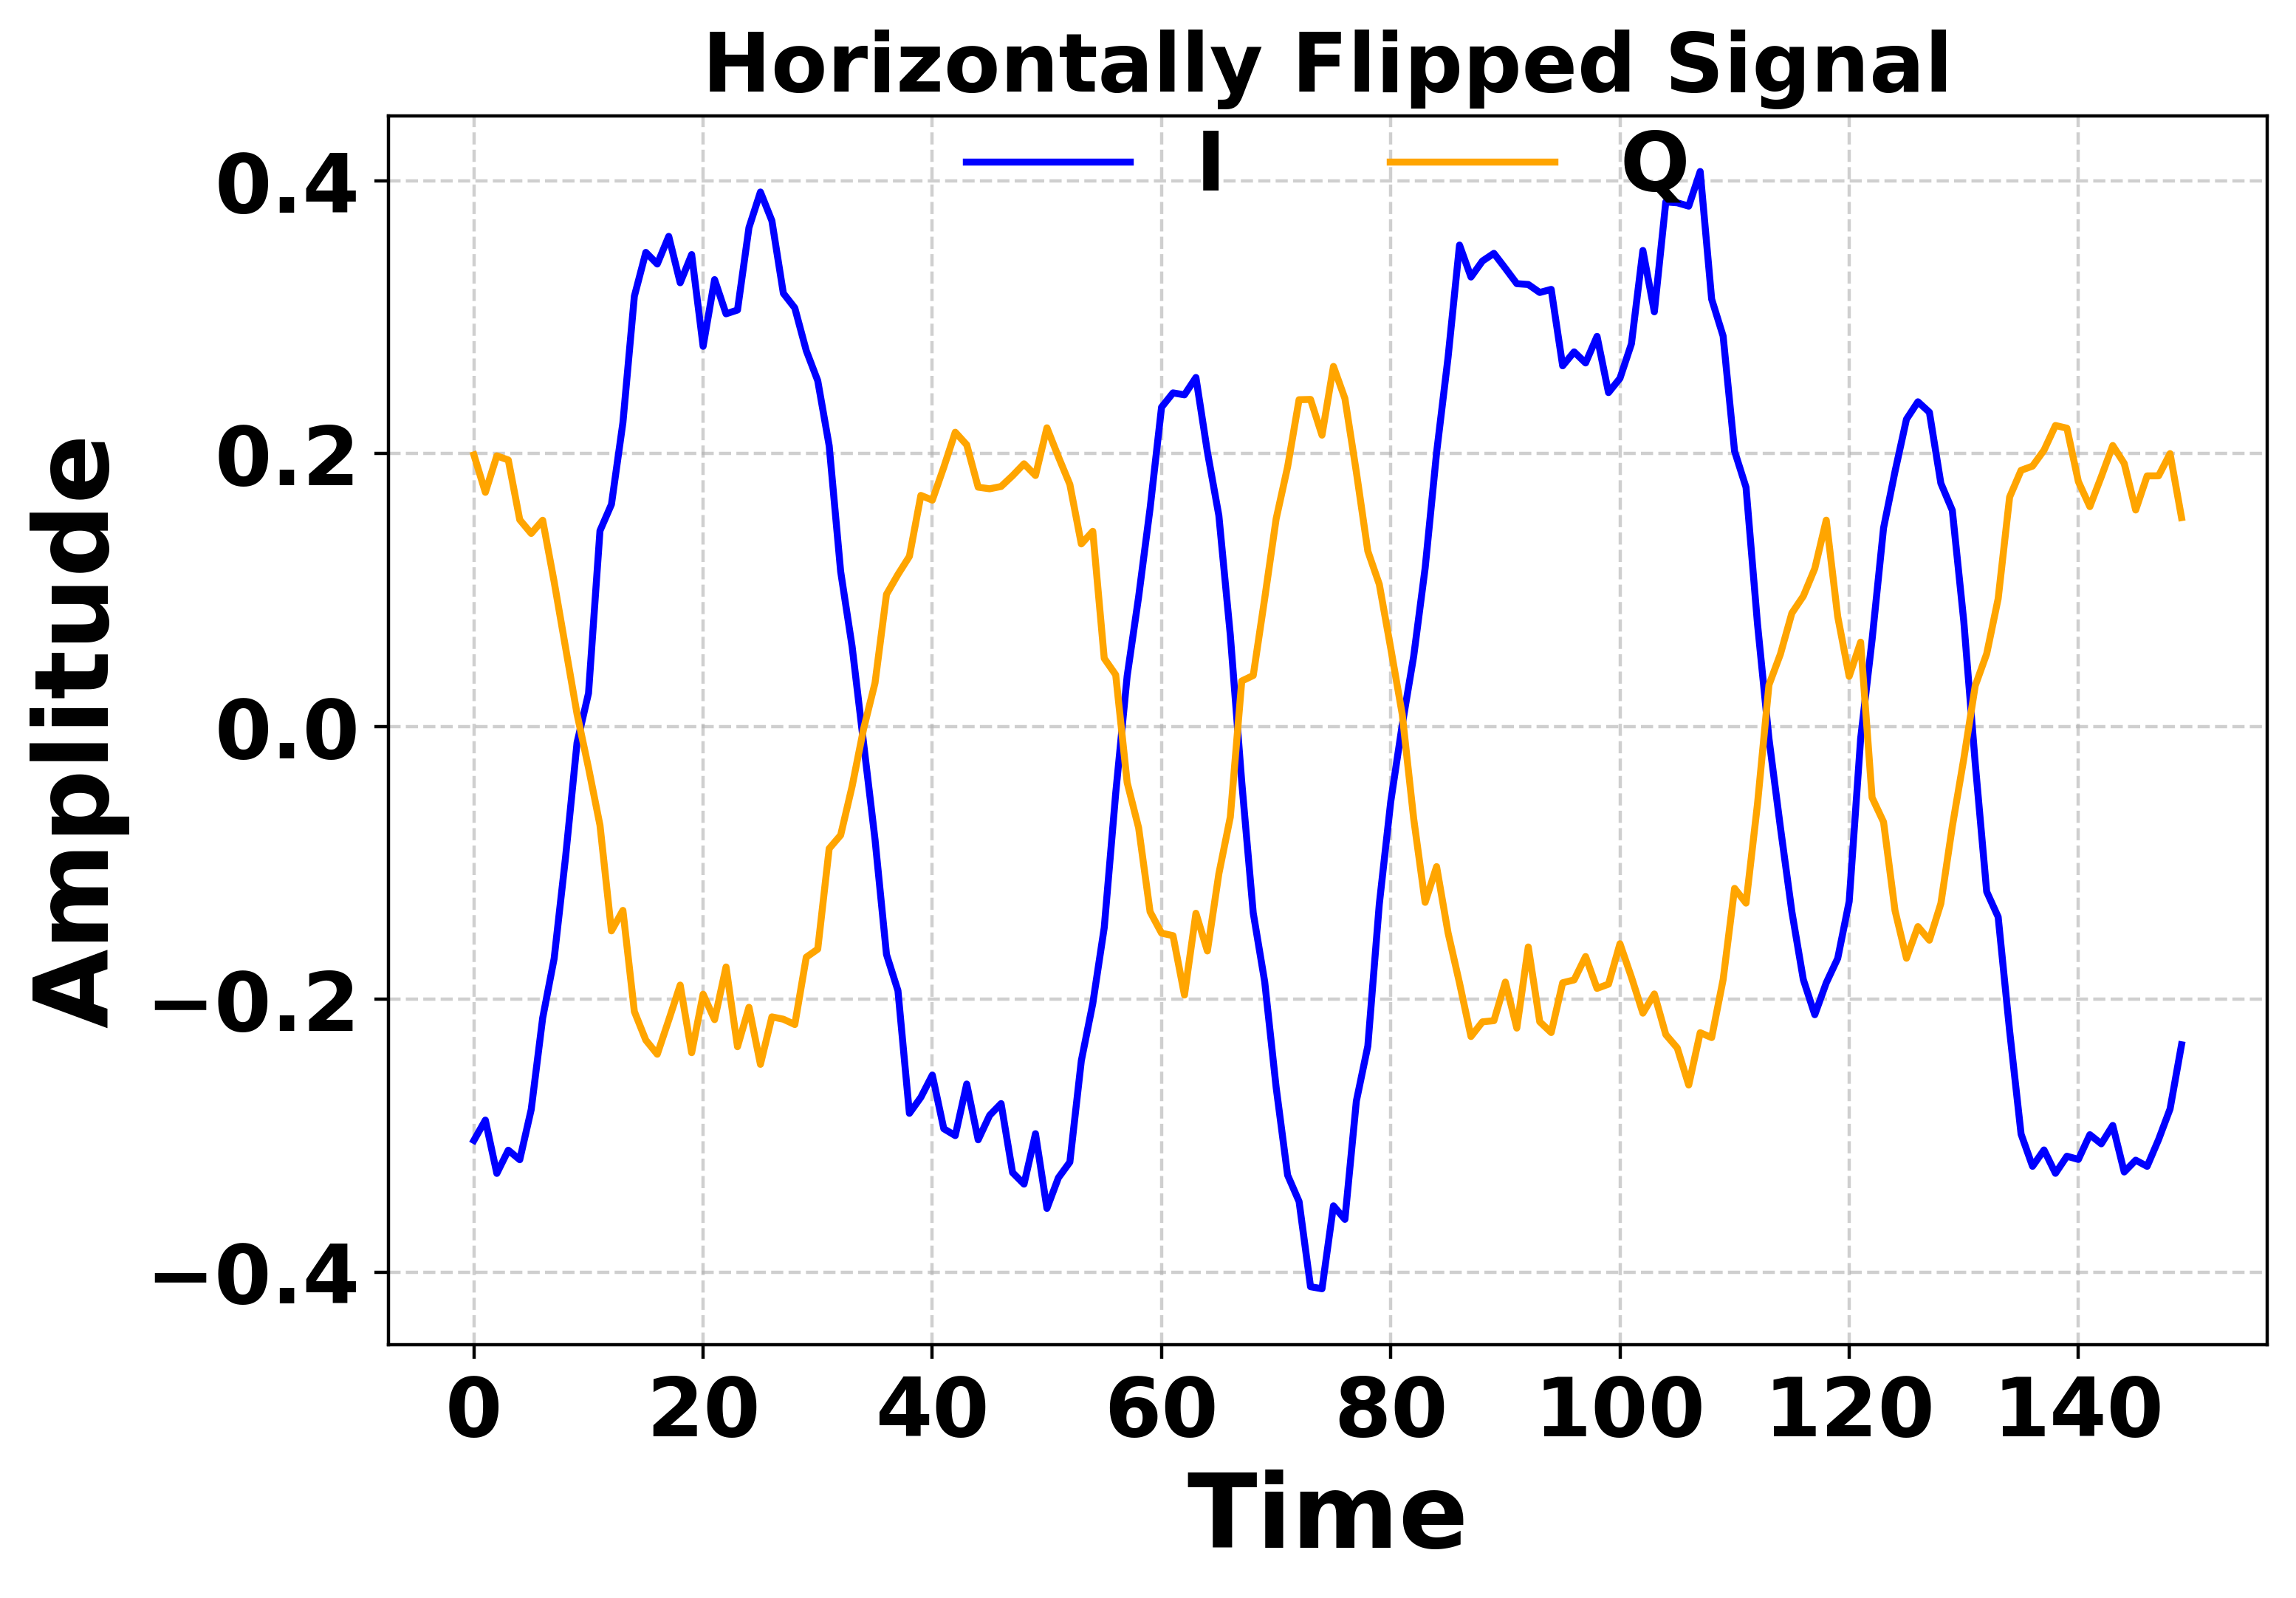

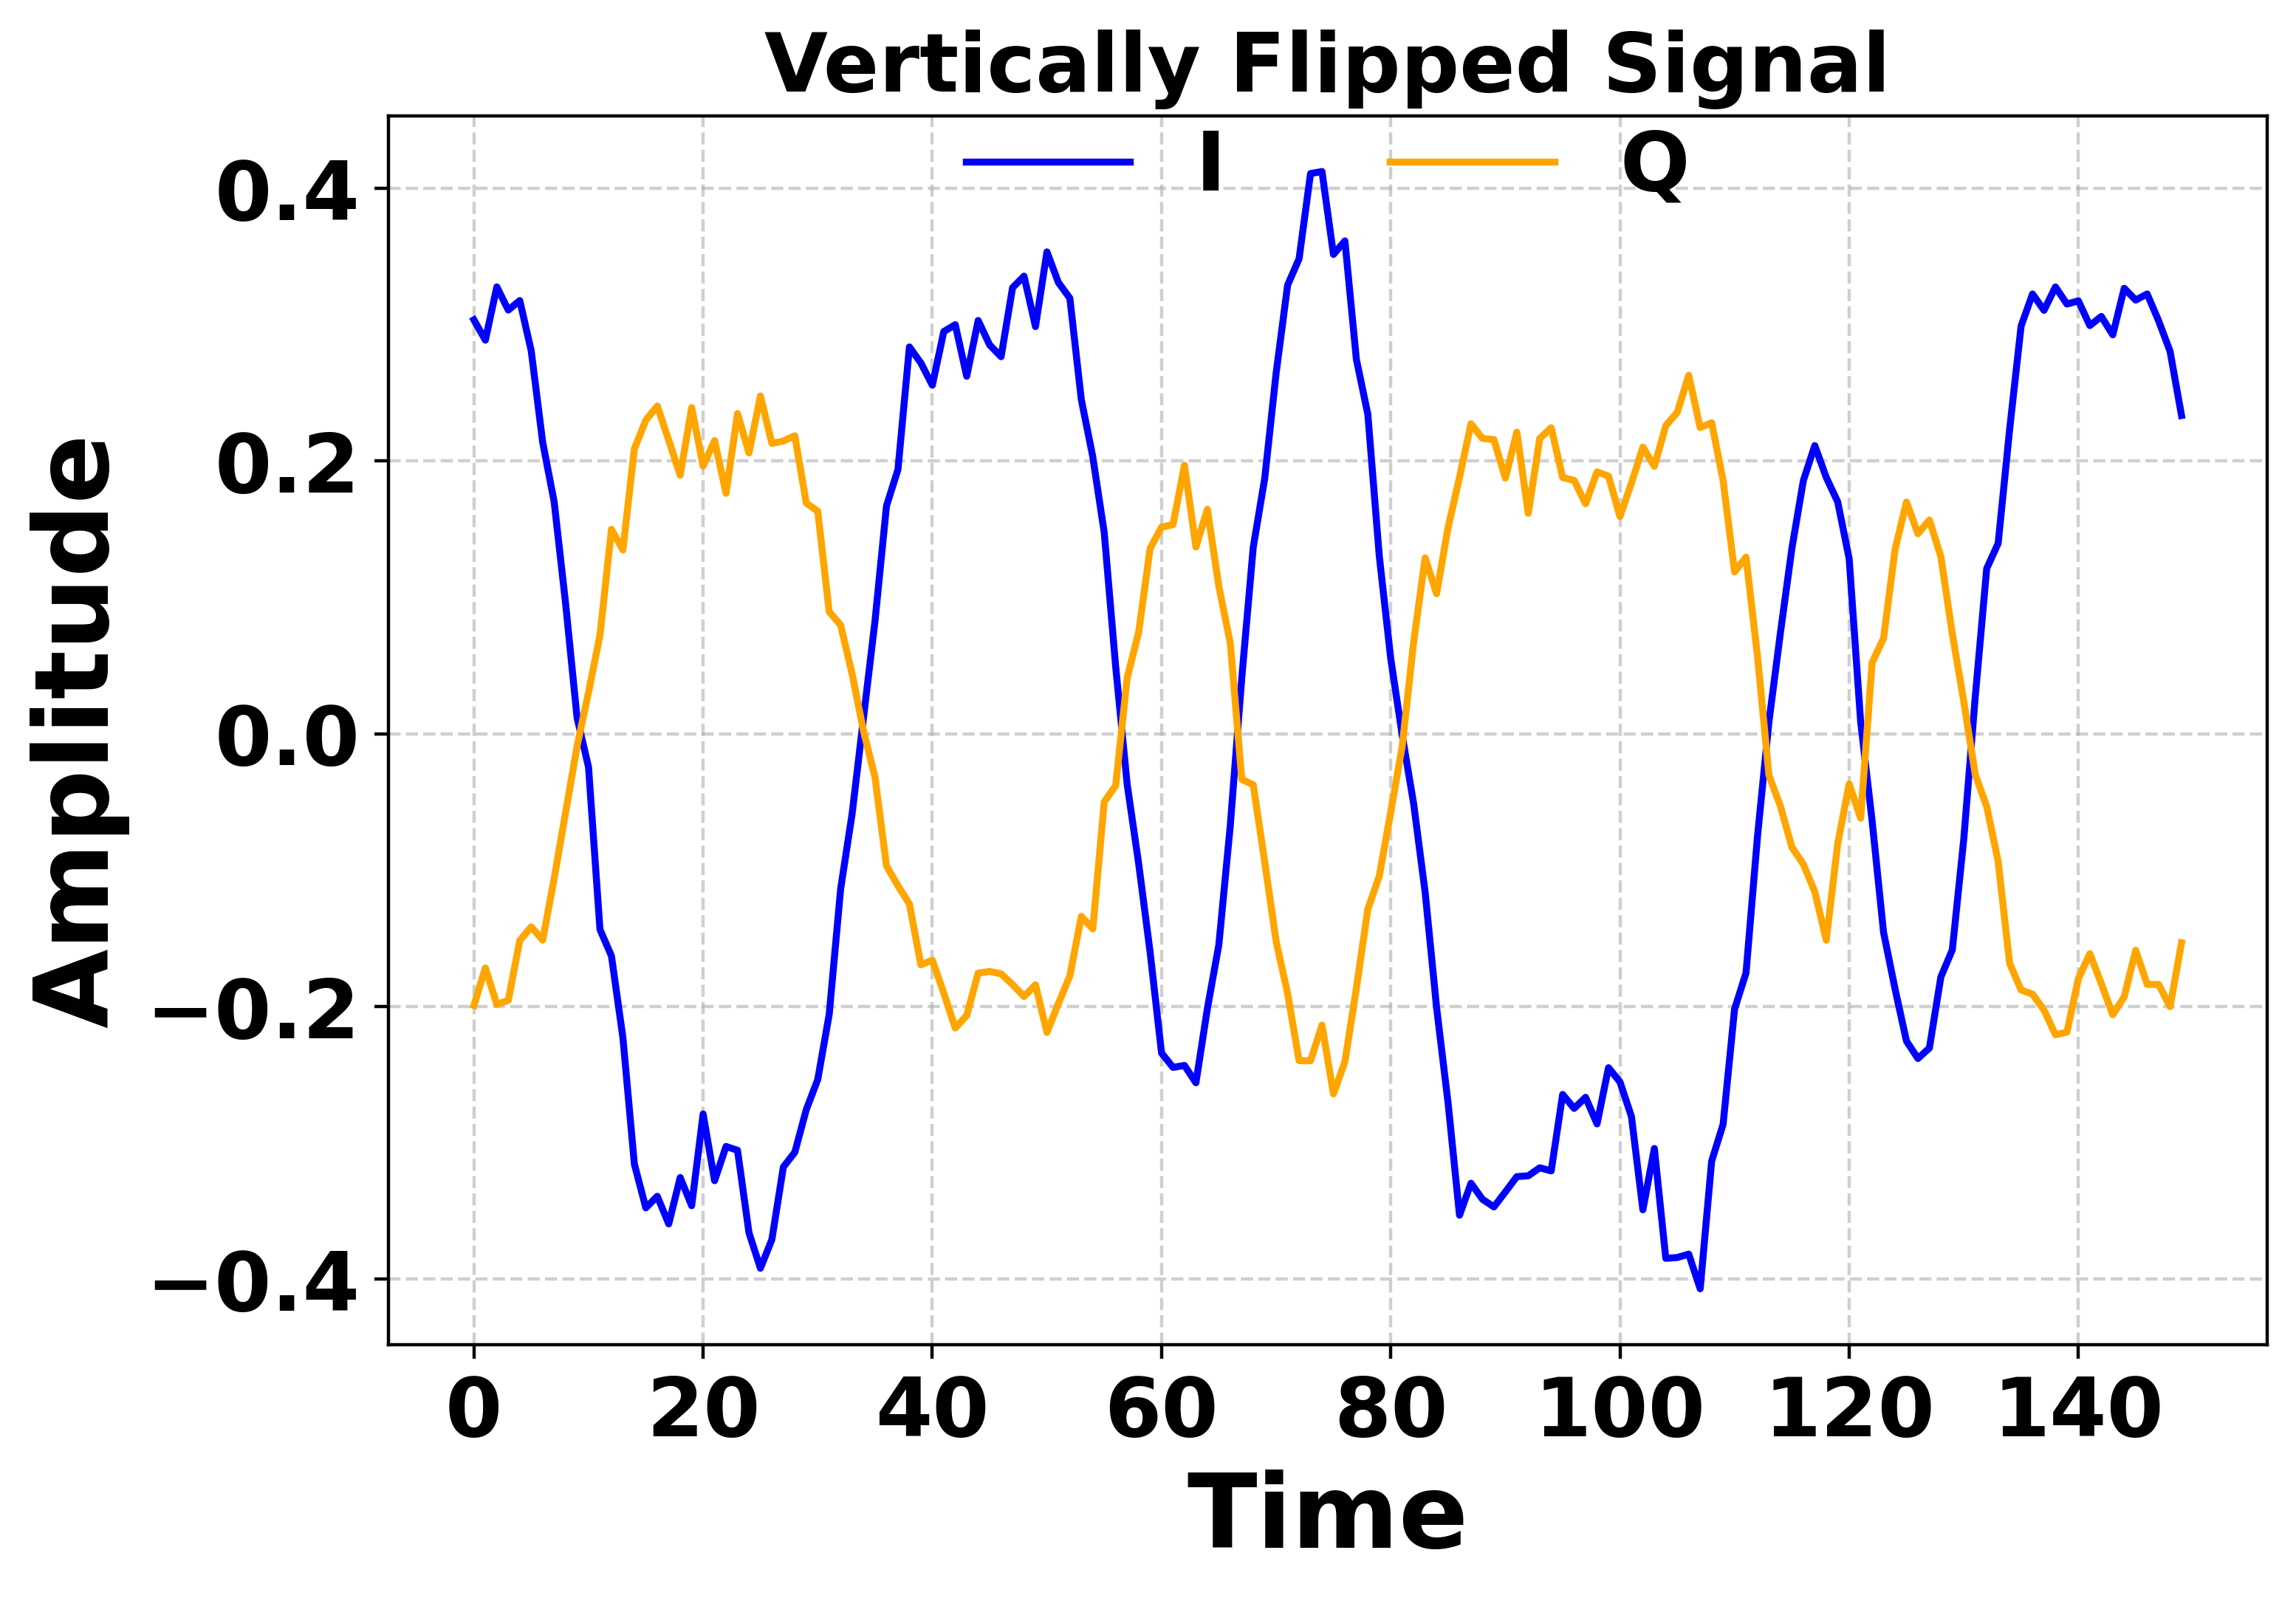

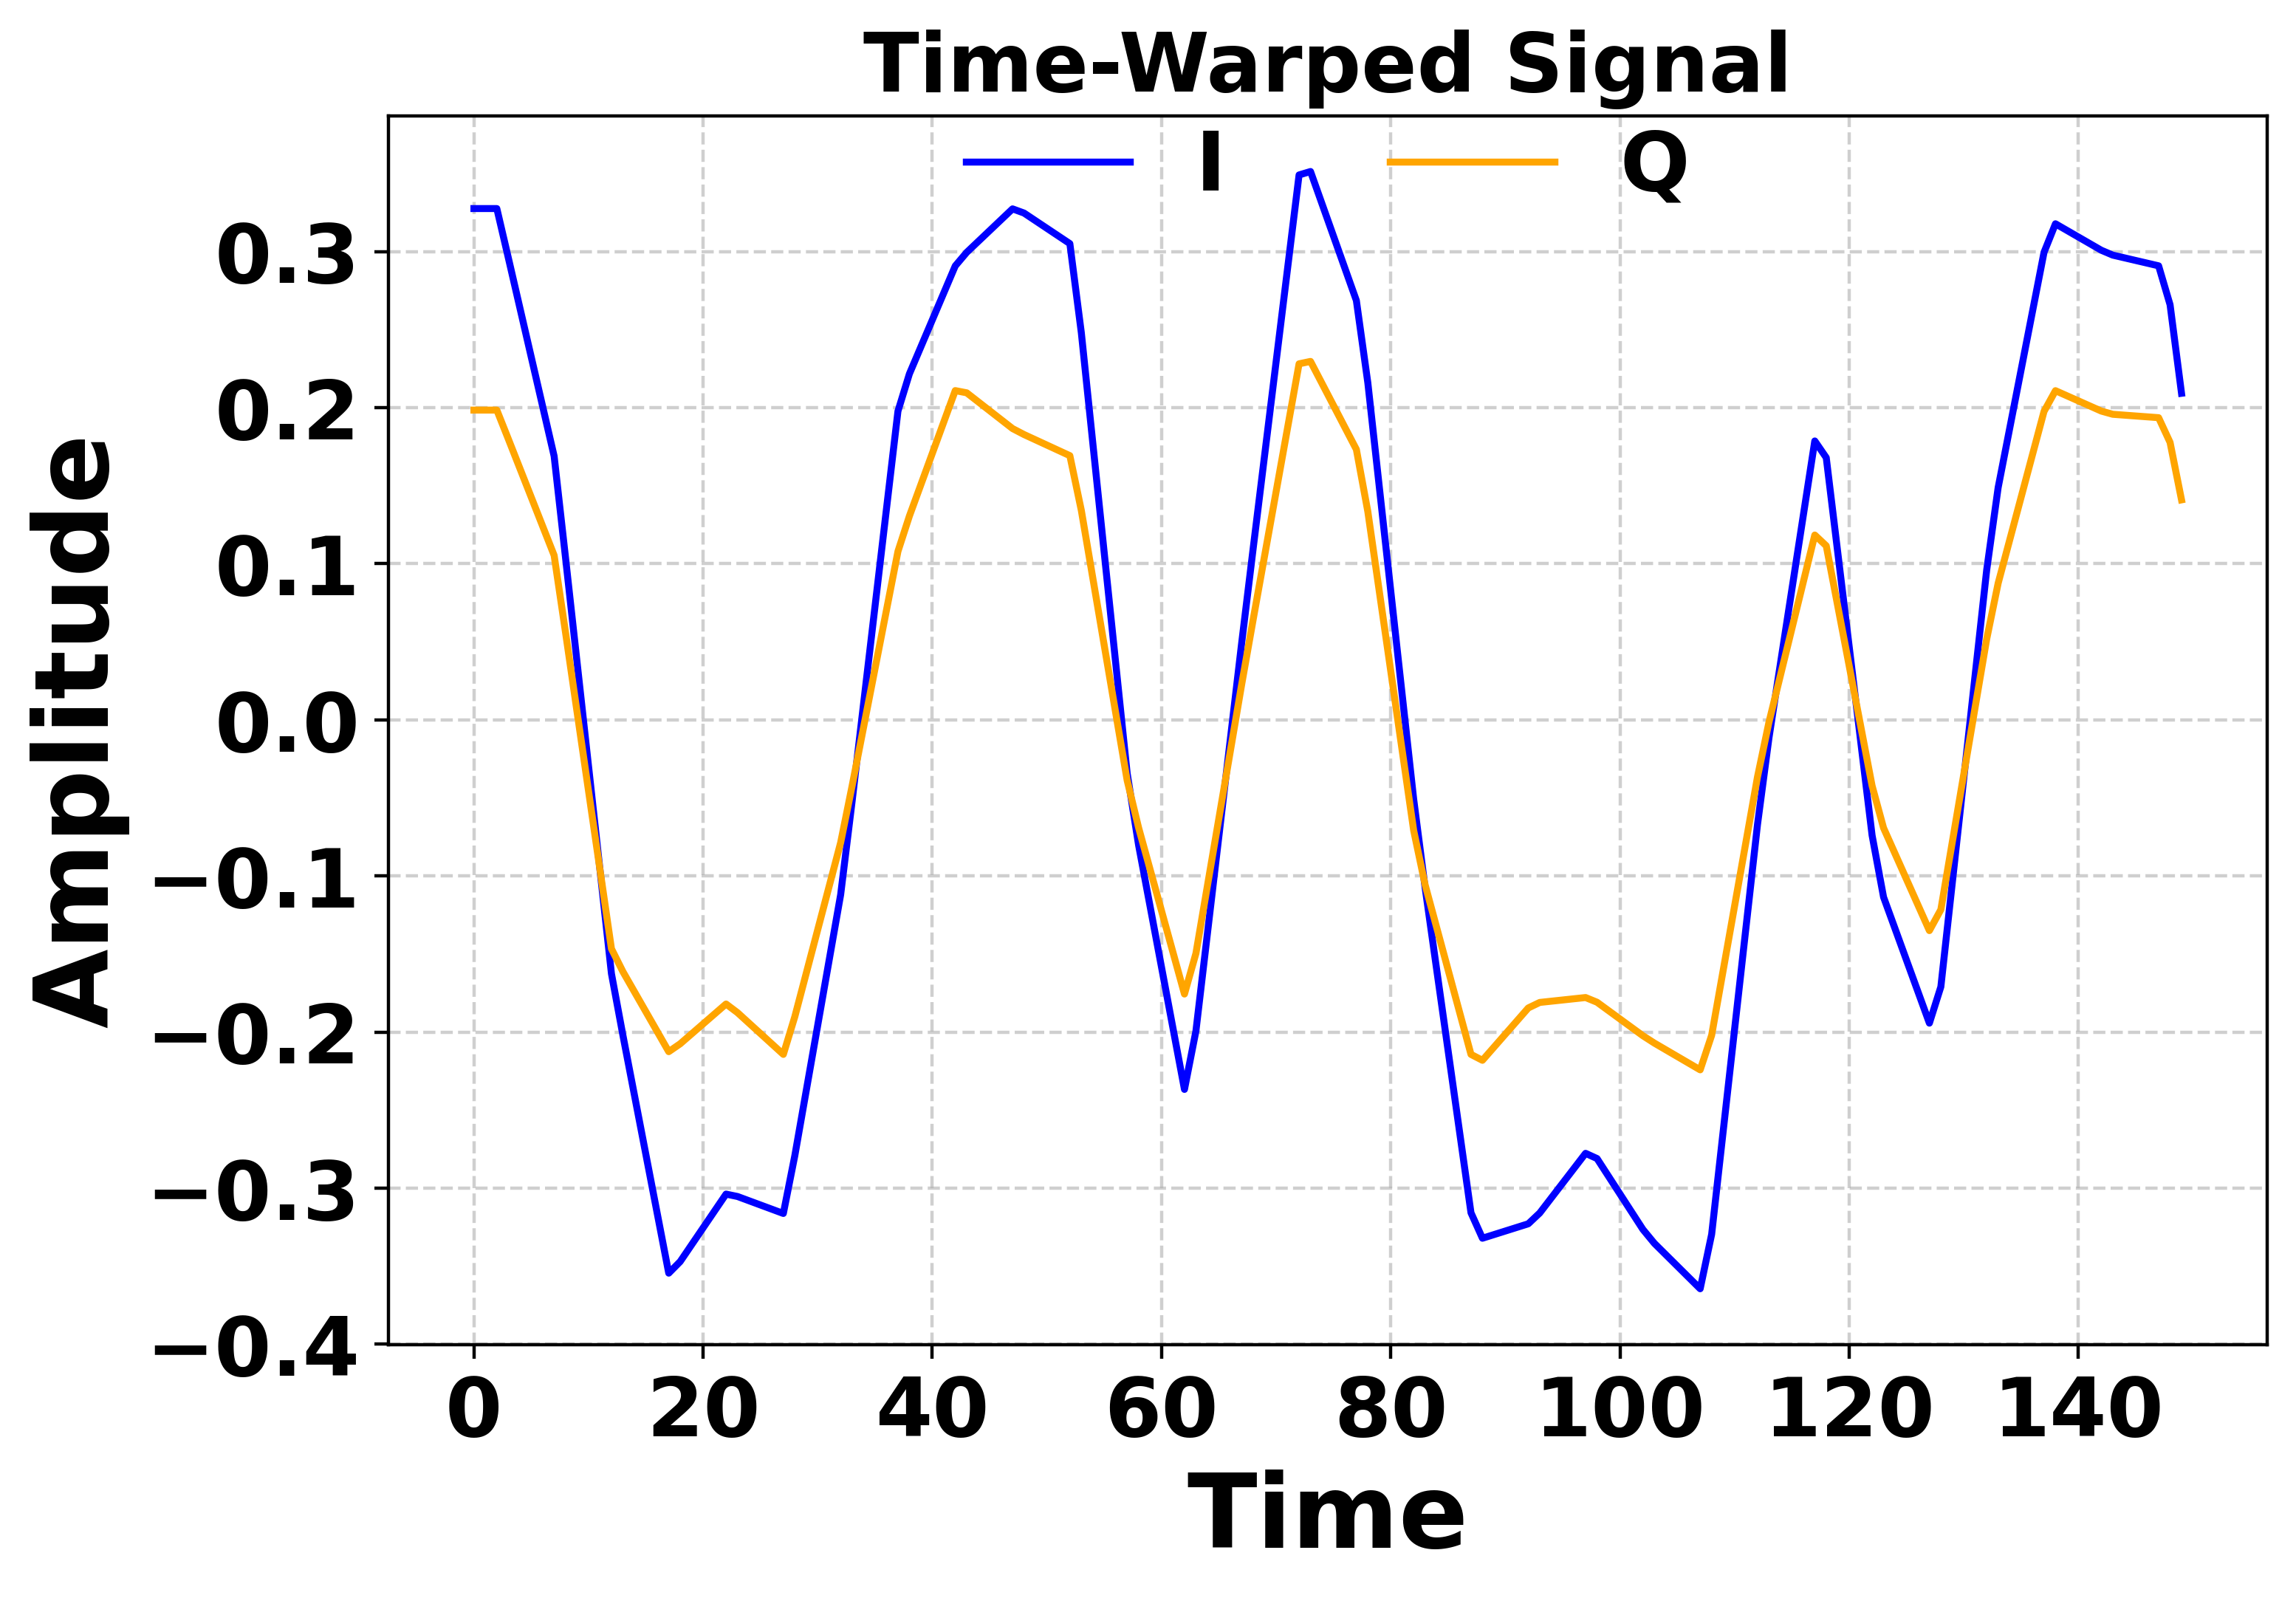

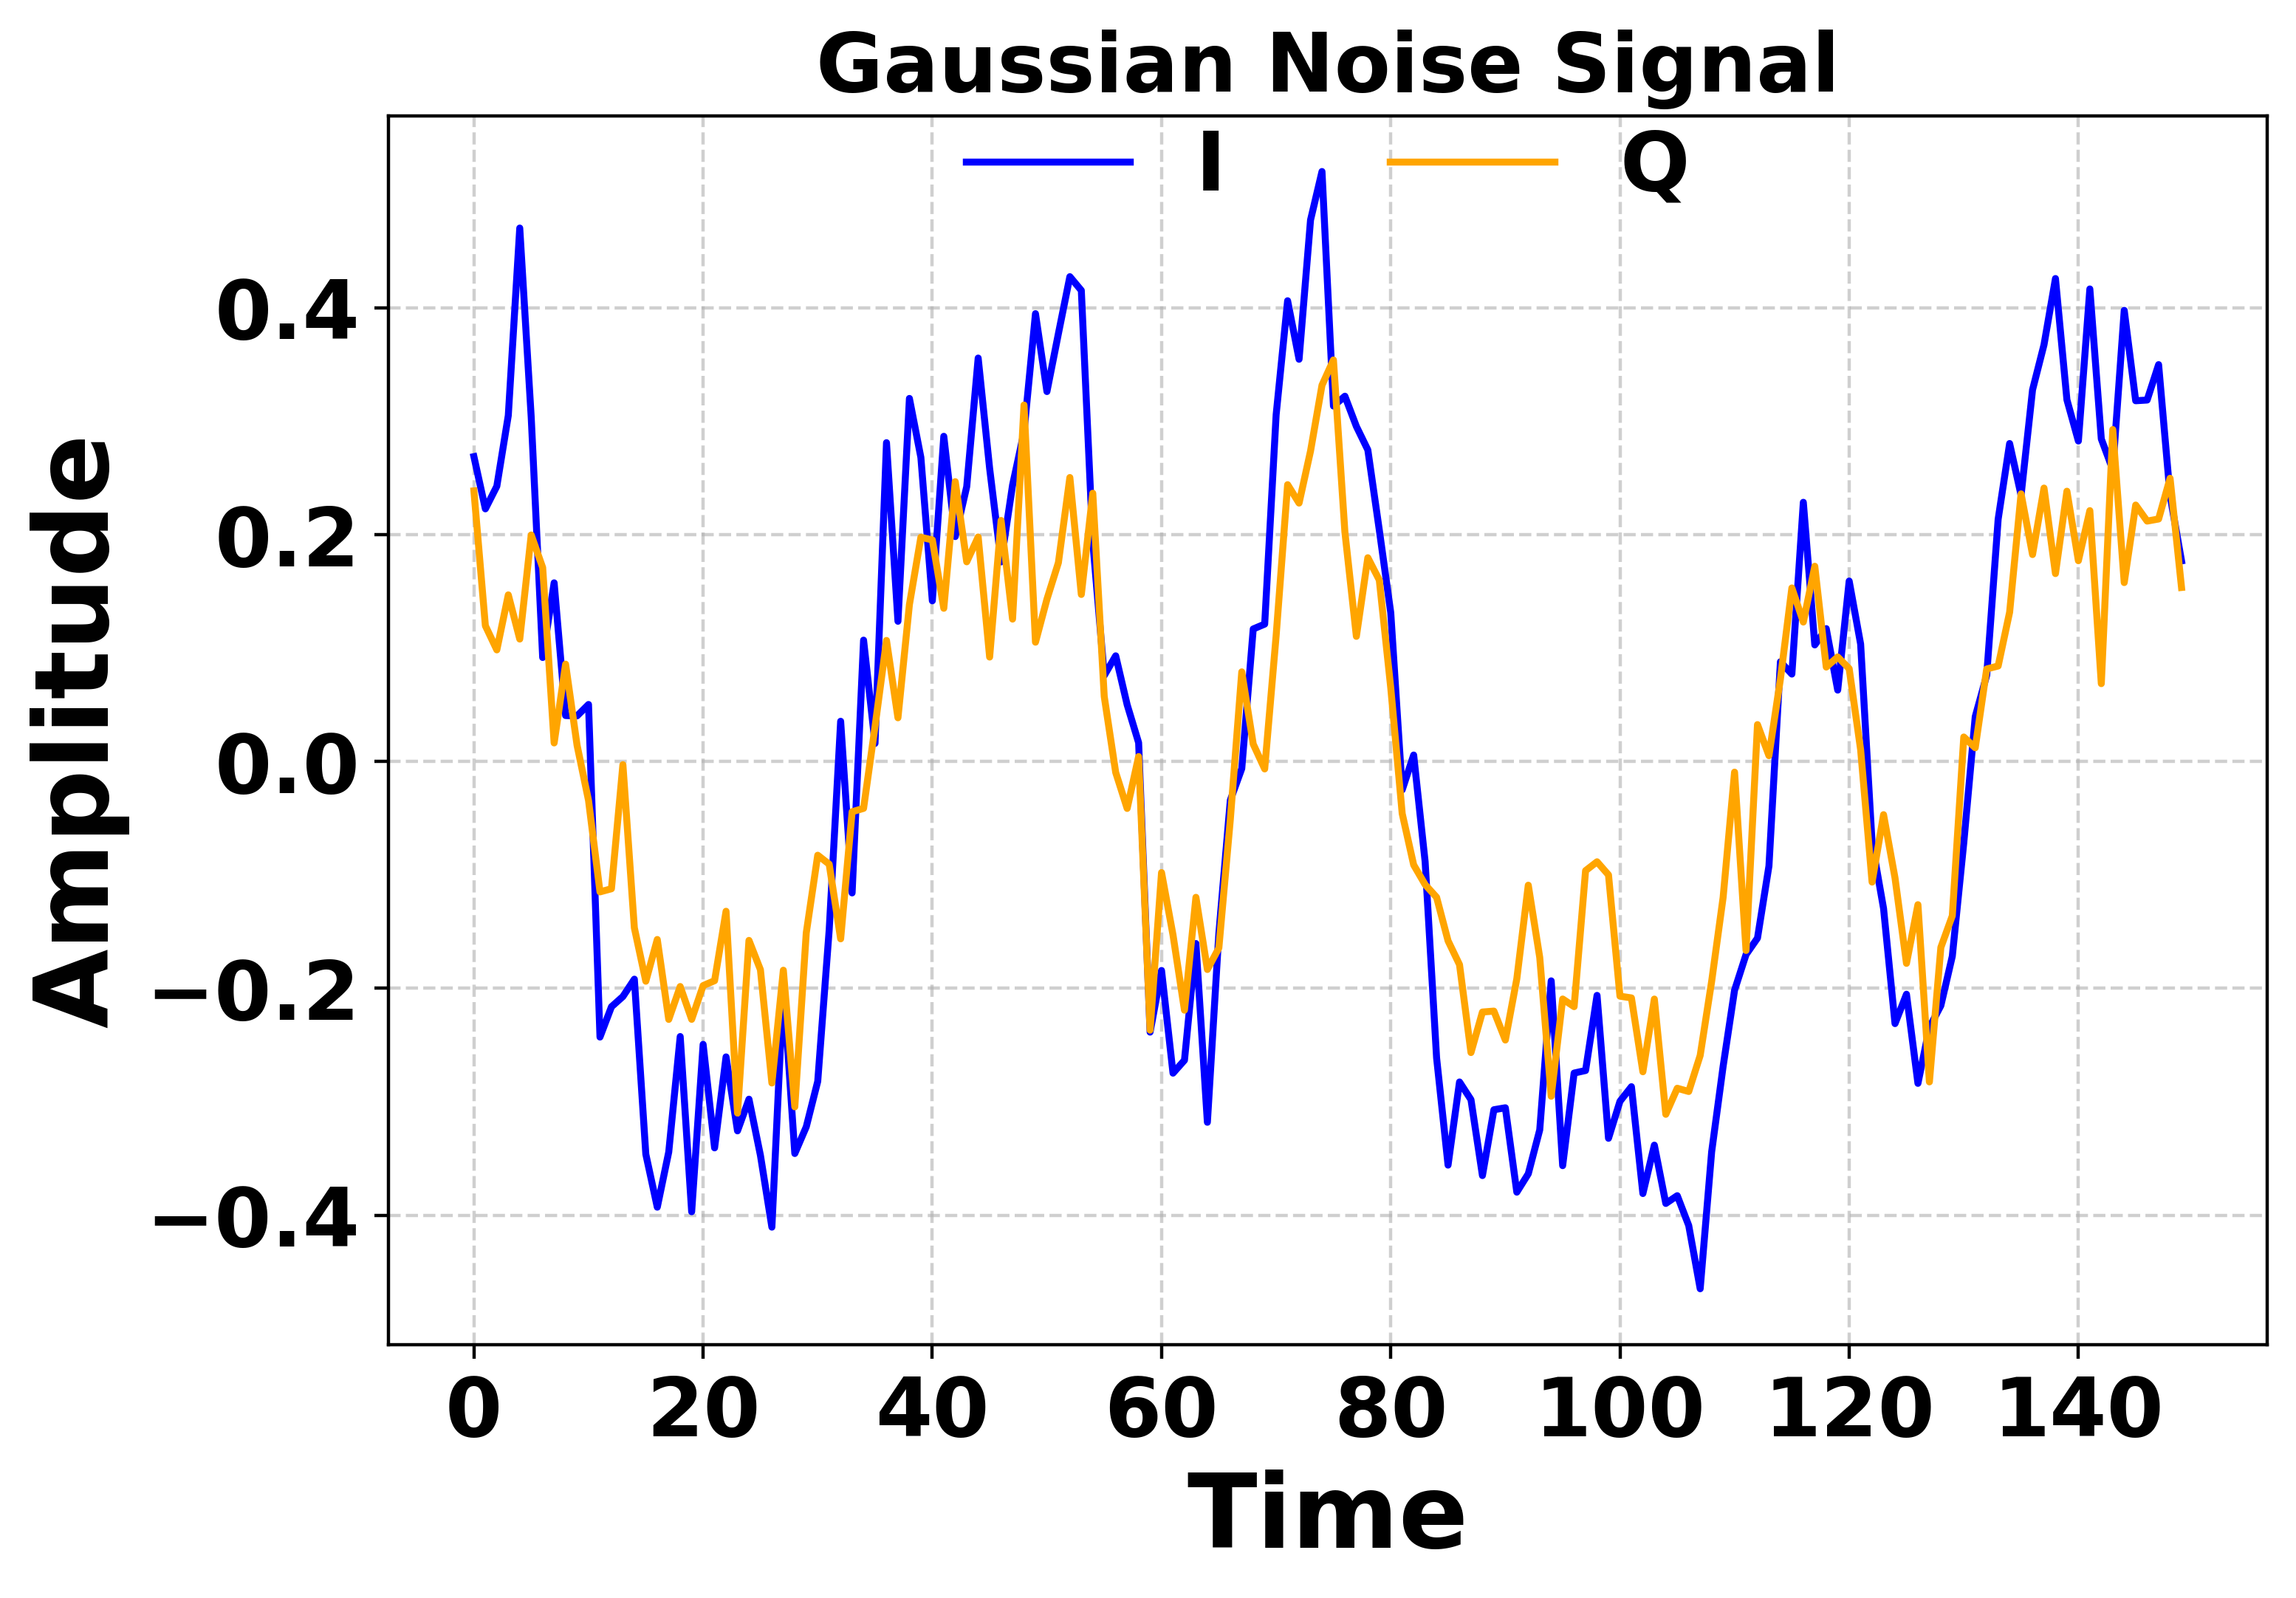

In [1]:
from utils import *
from dataset_finger import *
from augementation_iq import *
from dataset import *
# Load Configuration
from plotting_configs import *
from plotting_factory import plot_time_iq_signal
args = get_config_as_args()
args.batch_size = 4
# Initialize Train Dataset
#train_dataset = FingerprintingDataset(mode='train', num_of_sample=60000, num_of_sample_val=500, verbose=True)
#train_dataset = Sim_Dataset(mode='train', num_of_sample=60000, num_of_sample_val=500, verbose=True)
main_dataset = RML2018_Dataset(args=args)

# Create DataLoader
train_loader = prepare_dataloader(main_dataset.train_set, config)
train_loader.dataset.dataset.transform=build_transform(args,"full")

# Iterate through a few batches
for batch_idx, batch in enumerate(train_loader):
    iq_signals = batch["iq"]
    iq_rotated = batch["iq_rotated"]
    iq_flipped = batch["iq_flipped"]
    labels = batch["label"]
    snrs = batch["snr"]
    statuses = batch["status"]
    print(labels)
    print(f"Batch {batch_idx+1}:")
    print(f"  IQ Shape: {iq_signals[0].shape}")  # Expected: (batch_size, 1, 2, input_size)
    print(f"  Labels Shape: {labels.shape}")  # Expected: (batch_size,)
    print(f"  SNRs Shape: {snrs.shape}")      # Expected: (batch_size,)
    print(f"  Statuses Shape: {statuses.shape}")  # Expected: (batch_size,)
    print(f"  First few labels: {labels[:5].tolist()}")
    print(f"  First few SNRs: {snrs[:5].tolist()}")
    print(f"  First few Statuses: {statuses[:5].tolist()}")
    break
    # Stop after first batch to check output


plot_config_paper_quality_time = {
    'figure_size': (20 / 2.54, 14 / 2.54),  # ~11 cm × 7.5 cm
    'line_width': 1.7,
    'scatter_size': 50,
    'scatter_trigger_size': 70,
    'title_fontsize': 20,
    'label_fontsize': 25,
    'legend_fontsize': 20,
    'tick_fontsize': 20,
    'dpi': 400,
    'alpha': 0.95,
    'save_path': 'Paper_plot',
    'sig_length': 200,
    'plot_as_scatter': False,
    'scatter_iq_size': 50,
    'scatter_iq_trigger_size': 70,
    'signal_color': 'blue',
    'trigger_color': 'black',
    'fontweight_title': 'bold',
    'fontweight_label': 'bold',
    'legend_bbox': (0.5, 1.05),
    'legend_loc': 'upper center',
    'legend_ncol': 2,
    'show': True,
    'save_formats': ['pdf'],      
    'image_format_dpi': 400             
}


for batch_idx, batch in enumerate(train_loader):
    iq_signals = batch["iq"]
    iq_transformed = batch["iq_transformed"]
    iq_rotated = batch["iq_rotated"]
    iq_flipped = batch["iq_flipped"]
    labels = batch["label"]
    snrs = batch["snr"]
    statuses = batch["status"]
    
    for j in range(1):
        # Original signal
        plot_time_iq_signal(iq_signals[j], f"Original Signal", plot_config_paper_quality_time, 150)

        # Augmentations
        x_rotated = rotate_signal(iq_signals[j].clone(), random.choice([90, 270]))
        x_flipped_hori = flip_horizontal_signal(iq_signals[j].clone())
        x_flipped_ver = flip_vertical_signal(iq_signals[j].clone())
        x_time_warp = time_warp_signal(iq_signals[j].clone(), 0.2)
        gaussian_signal = add_gaussian_noise(iq_signals[j].clone(), 0.06)

        # Plot augmented signals
        plot_time_iq_signal(x_rotated, f"Rotated Signal", plot_config_paper_quality_time, 150)
        plot_time_iq_signal(x_flipped_hori, f"Horizontally Flipped Signal", plot_config_paper_quality_time, 150)
        plot_time_iq_signal(x_flipped_ver, f"Vertically Flipped Signal", plot_config_paper_quality_time, 150)
        plot_time_iq_signal(x_time_warp, f"Time-Warped Signal", plot_config_paper_quality_time, 150)
        plot_time_iq_signal(gaussian_signal, f"Gaussian Noise Signal", plot_config_paper_quality_time, 150)
   # plot_time_iq_signal(iq_rotated[0], f"Rotated Signal",plot_config_quick_view,100)
   # plot_time_iq_signal(iq_flipped[0], f"Flipped Signal",plot_config_quick_view,100)
    break


##Testing Transformation

In [ ]:
import torch
from utils import *
from dataset import *
from plotting_factory import plot_time_iq_signal
from plotting_configs import plot_config_paper_quality_time,plot_config_quick_view
from augementation_iq import build_transform

# Step 1: Load config and dataset
args = get_config_as_args()
args.Aug_prob=1

config=get_config()
train_dataset = RML2018_Dataset( args=args)
train_loader = prepare_dataloader(train_dataset.train_set, config)

# Step 2: Build transform from config using 'full' set
transform = build_transform(args, aug_list_name='full')

# Step 3: Get one sample
batch = next(iter(train_loader))
iq_signal = batch["iq"][0].unsqueeze(0)  # shape: [1, 2, N]
print(iq_signal.shape)
# Step 4: Apply transform
if transform:
   
    iq_aug = transform(iq_signal[0])
else:
    iq_aug = iq_signal
print(iq_aug.shape)
# Step 5: Plot original and augmented signals
plot_time_iq_signal(iq_signal[0], "Original Signal", plot_config_quick_view, 100)
plot_time_iq_signal(iq_aug[0], "Augmented Signal", plot_config_quick_view, 100)


[Shuffle & Restart] Splits set: train=644, val=92, test=185
Splits created: Train=644, Val=92, Test=185
Dataset loaded with 921 total filtered samples
Batch 1:
  IQ Shape: torch.Size([1, 2, 512])
  Labels Shape: torch.Size([128])
  SNRs Shape: torch.Size([128])
  Statuses Shape: torch.Size([128])
  First few labels: [4, 9, 13, 8, 5]
  First few SNRs: [14, 4, 6, 16, 4]
  First few Statuses: [0, 0, 0, 0, 0]


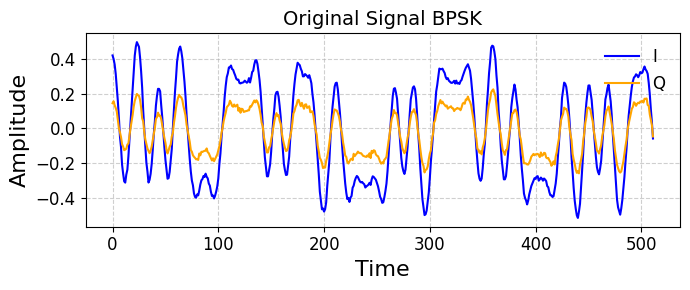

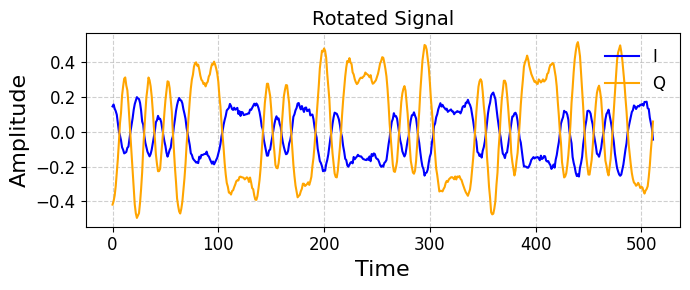

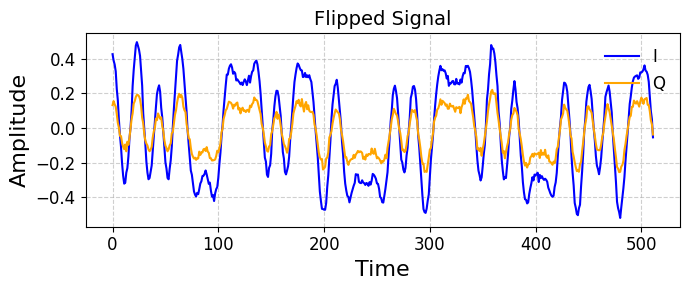

In [4]:
from utils import *
from dataset_finger import *
from augementation_iq import *
from dataset import *
# Load Configuration
from plotting_configs import *
from plotting_factory import plot_time_iq_signal
args = get_config_as_args()

# Initialize Train Dataset
#train_dataset = FingerprintingDataset(mode='train', num_of_sample=60000, num_of_sample_val=500, verbose=True)
#train_dataset = Sim_Dataset(mode='train', num_of_sample=60000, num_of_sample_val=500, verbose=True)
main_dataset = RML2018_Dataset(args=args)

# Create DataLoader
train_loader = prepare_dataloader(main_dataset.train_set, config)
current_classes=args.current_classes

# Iterate through a few batches
for batch_idx, batch in enumerate(train_loader):
    iq_signals = batch["iq"]
    iq_rotated = batch["iq_rotated"]
    iq_flipped = batch["iq_flipped"]
    labels = batch["label"]
    has_label = batch["has_labeled"]
    snrs = batch["snr"]
    statuses = batch["status"]
   
    print(f"Batch {batch_idx+1}:")
    print(f"  IQ Shape: {iq_signals[0].shape}")  # Expected: (batch_size, 1, 2, input_size)
    print(f"  Labels Shape: {labels.shape}")  # Expected: (batch_size,)
    print(f"  SNRs Shape: {snrs.shape}")      # Expected: (batch_size,)
    print(f"  Statuses Shape: {statuses.shape}")  # Expected: (batch_size,)
    print(f"  First few labels: {labels[:5].tolist()}")
    print(f"  First few SNRs: {snrs[:5].tolist()}")
    print(f"  First few Statuses: {statuses[:5].tolist()}")
    break
    # Stop after first batch to check output

for batch_idx, batch in enumerate(train_loader):
    iq_signals = batch["iq"]
    iq_rotated = batch["iq_rotated"]
    iq_flipped = batch["iq_flipped"]
    labels = batch["label"]
    snrs = batch["snr"]
    statuses = batch["status"]
    plot_time_iq_signal(iq_signals[0], f"Original Signal {current_classes[labels[0]]}",plot_config_quick_view,512)
    plot_time_iq_signal(iq_rotated[0], f"Rotated Signal",plot_config_quick_view,512)
    plot_time_iq_signal(iq_flipped[0], f"Flipped Signal",plot_config_quick_view,512)
    break
